In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import category_encoders as ce

In [2]:
df = pd.read_csv(r'C:/Users/ashuo/DNS/data/generated_dataset_from_dns_response.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   full_domain                 338 non-null    object 
 1   tld                         338 non-null    object 
 2   full_domain_length          338 non-null    int64  
 3   domain_length               338 non-null    int64  
 4   has_subdomain               338 non-null    int64  
 5   subdomain_length            338 non-null    int64  
 6   subdomains_count            338 non-null    float64
 7   avg_subdomain_length        338 non-null    float64
 8   entropy_of_domain           338 non-null    float64
 9   avg_entropy_of_subdomains   338 non-null    float64
 10  alphanumeric_ratio          338 non-null    float64
 11  numeric_ratio               338 non-null    float64
 12  special_char_ratio          338 non-null    float64
 13  label                       338 non

#Dropping the columns that are not required


In [3]:
columns_to_be_dropped = [col for col in df.columns if col.startswith('NS')]
columns_to_be_dropped.append('full_domain')
#columns_to_be_dropped.append('tld')
columns_to_be_dropped.append('ipv4_address')
columns_to_be_dropped.append('ipv6_address')
df = df.drop(columns_to_be_dropped, axis=1)
df.head(3)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tld                         338 non-null    object 
 1   full_domain_length          338 non-null    int64  
 2   domain_length               338 non-null    int64  
 3   has_subdomain               338 non-null    int64  
 4   subdomain_length            338 non-null    int64  
 5   subdomains_count            338 non-null    float64
 6   avg_subdomain_length        338 non-null    float64
 7   entropy_of_domain           338 non-null    float64
 8   avg_entropy_of_subdomains   338 non-null    float64
 9   alphanumeric_ratio          338 non-null    float64
 10  numeric_ratio               338 non-null    float64
 11  special_char_ratio          338 non-null    float64
 12  label                       338 non-null    int64  
 13  A_response_country_code     338 non

# Analayis on the basis of Organisation Name


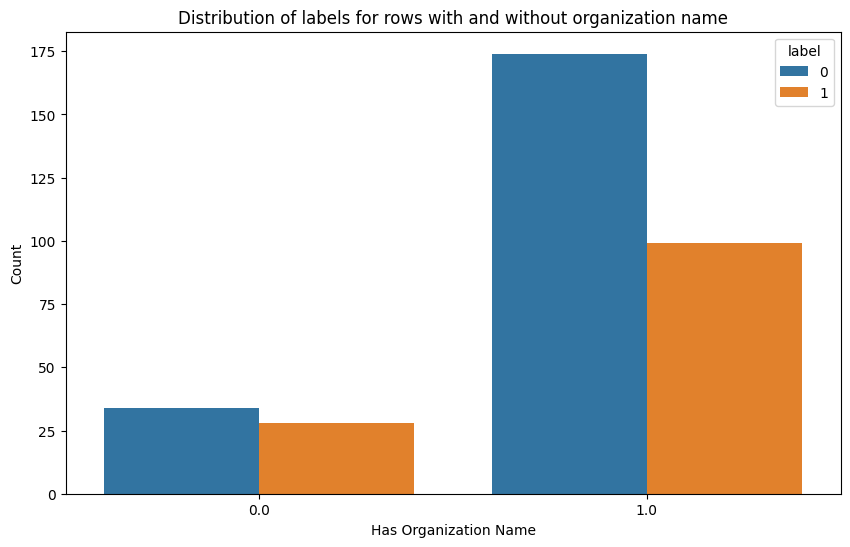

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='has_organization_name', hue='label', data=df)
plt.title('Distribution of labels for rows with and without organization name')
plt.xlabel('Has Organization Name')
plt.ylabel('Count')
plt.show()

# 0 is for non malicious and 1 is for malicious

#Interpretation: 

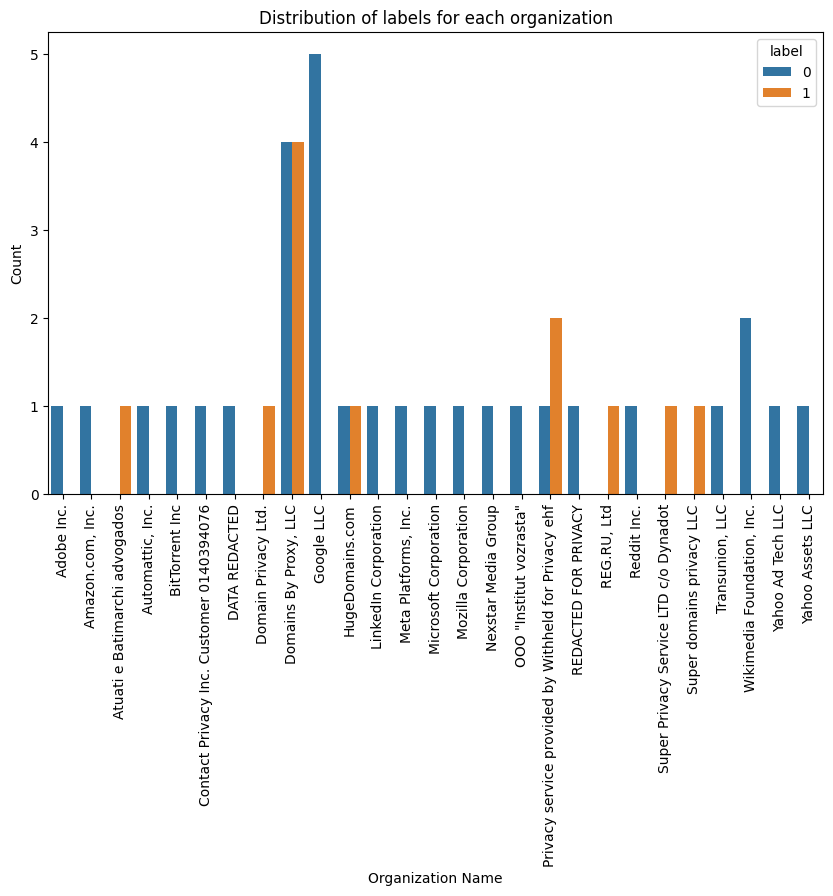

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

temp = df.head(50)
# Group the data and count the number of labels for each organization
grouped_df = temp.groupby(['organization_name', 'label']).size().reset_index(name='count')

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='organization_name', y='count', hue='label', data=grouped_df)

plt.title('Distribution of labels for each organization')
plt.xlabel('Organization Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

# Analysis on the basis of tld

In [6]:
tld_counts = df.groupby('tld').size().reset_index(name='count')
print(tld_counts)

       tld  count
0       be      1
1      cam      1
2     casa      2
3       cc      1
4       cl      1
5    click      1
6     club      1
7       co      2
8    co.in      1
9    co.uk      3
10     com    247
11  com.au      1
12  com.br      2
13  com.tr      1
14  com.vn      2
15      de      2
16      fi      1
17      gl      1
18      ie      1
19      in      1
20    info      3
21      it      2
22      jp      1
23      li      1
24      me      1
25     net     36
26      nl      1
27  online      1
28     org     10
29      pl      1
30  report      1
31      ru      3
32      su      1
33      tv      1
34      us      1
35     xyz      1


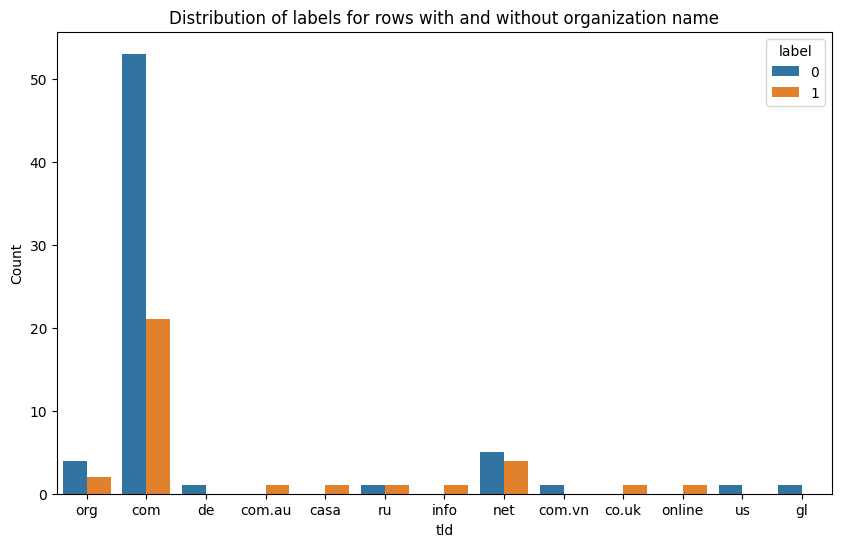

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tld', hue='label', data=df.head(100))
plt.title('Distribution of labels for rows with and without organization name')
plt.xlabel('tld')
plt.ylabel('Count')
plt.show()

# 0 is for non malicious and 1 is for malicious

#Interpretation:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tld                         338 non-null    object 
 1   full_domain_length          338 non-null    int64  
 2   domain_length               338 non-null    int64  
 3   has_subdomain               338 non-null    int64  
 4   subdomain_length            338 non-null    int64  
 5   subdomains_count            338 non-null    float64
 6   avg_subdomain_length        338 non-null    float64
 7   entropy_of_domain           338 non-null    float64
 8   avg_entropy_of_subdomains   338 non-null    float64
 9   alphanumeric_ratio          338 non-null    float64
 10  numeric_ratio               338 non-null    float64
 11  special_char_ratio          338 non-null    float64
 12  label                       338 non-null    int64  
 13  A_response_country_code     338 non

In [9]:
df.head(1)

,tld,full_domain_length,domain_length,has_subdomain,subdomain_length,subdomains_count,avg_subdomain_length,entropy_of_domain,avg_entropy_of_subdomains,alphanumeric_ratio,...,has_MX_response,has_NS_response,number_of_TXT_responses,number_of_MX_responses,number_of_NS_responses,creation_date,last_updated_date,expiration_date,organization_name,has_organization_name
0,org,13,9,0,0,0.0,0.0,3.334679,0.0,0.923077,...,1,1,5,2,3,2003-03-16 08:22:47,2023-08-10 15:53:36,2024-03-16 08:22:47,"Wikimedia Foundation, Inc.",1.0


# Working with dates

In [10]:
#temp = df
##series = temp['last_updated_date']
#print(series[0])
#value = series[0].split(',')[0]
#print(value)
#time = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
#print(time)

#ignore last date for the time being .



In [11]:
current_date = datetime.now()

# Convert 'creation_date' and 'expiration_date' columns to datetime
df['creation_date'] = pd.to_datetime(df['creation_date'])
#df['last_updated_date'] = pd.to_datetime(df['last_updated_date'])
df['expiration_date'] = pd.to_datetime(df['expiration_date'])

df['days_since_creation'] = (current_date - df['creation_date']).dt.days
#df['days_since_last_updated'] = (current_date - df['last_updated_date']).dt.days

# Calculate days left to expire and mark expired domains
df['days_left_to_expire'] = (df['expiration_date'] - current_date).dt.days
df.loc[df['days_left_to_expire'] < 0, 'days_left_to_expire'] = 0

# Mark the expired domains (if expiration_date < current_date)
df['domain_expired'] = df['expiration_date'] < current_date



In [12]:
df.head(10)

,tld,full_domain_length,domain_length,has_subdomain,subdomain_length,subdomains_count,avg_subdomain_length,entropy_of_domain,avg_entropy_of_subdomains,alphanumeric_ratio,...,number_of_MX_responses,number_of_NS_responses,creation_date,last_updated_date,expiration_date,organization_name,has_organization_name,days_since_creation,days_left_to_expire,domain_expired
0,org,13,9,0,0,0.0,0.0,3.334679,0.0,0.923077,...,2,3,2003-03-16 08:22:47,2023-08-10 15:53:36,2024-03-16 08:22:47,"Wikimedia Foundation, Inc.",1.0,7580.0,90.0,False
1,com,10,6,0,0,0.0,0.0,3.121928,0.0,0.900000,...,5,4,2005-04-29 17:59:19,"['2022-03-28 09:30:06', '2022-03-28 09:30:07']",2024-04-29 17:59:19,Reddit Inc.,1.0,6805.0,134.0,False
2,com,13,9,0,0,0.0,0.0,3.180833,0.0,0.923077,...,1,5,2006-01-31 21:23:03,"['2022-12-30 09:08:59', '2023-06-13 21:22:32']",2024-01-31 21:23:03,Yahoo Assets LLC,1.0,6527.0,46.0,False
3,com,11,7,0,0,0.0,0.0,2.913977,0.0,0.909091,...,1,4,2007-12-13 20:23:30,2023-11-28 15:21:12,2024-12-13 20:23:30,Contact Privacy Inc. Customer 0140394076,1.0,5846.0,363.0,False
4,com,12,8,0,0,0.0,0.0,3.188722,0.0,0.916667,...,0,4,2000-07-31 21:38:58,2023-06-29 10:00:58,2024-07-31 21:38:58,Google LLC,1.0,8537.0,228.0,False
5,com,12,8,0,0,0.0,0.0,3.251629,0.0,0.916667,...,0,2,2022-12-07 20:43:29,"['2023-12-11 13:26:01', '2022-12-07 15:43:30']",2024-12-07 20:43:29,"Domains By Proxy, LLC",1.0,373.0,357.0,False
6,com,14,10,0,0,0.0,0.0,3.378783,0.0,0.928571,...,4,5,2009-02-17 22:07:54,"['2017-05-24 17:44:01', '2021-09-27 15:18:45']",2024-02-17 22:07:54,DATA REDACTED,1.0,5414.0,63.0,False
7,com,16,12,0,0,0.0,0.0,3.750000,0.0,0.937500,...,2,2,1998-09-11 04:00:00,2023-09-11 04:01:52,2033-09-10 04:00:00,NaN,0.0,9227.0,3555.0,False
8,com,13,9,0,0,0.0,0.0,3.180833,0.0,0.923077,...,0,4,2000-03-03 01:13:20,"['2023-07-02 19:45:50', '2023-03-03 10:46:42']",2024-03-03 01:13:20,"Domains By Proxy, LLC",1.0,8688.0,77.0,False
9,com,14,10,0,0,0.0,0.0,3.182006,0.0,0.928571,...,1,2,2013-10-13 21:06:05,"['2021-02-26 15:15:04', '2021-02-26 15:15:05']",2026-10-13 21:06:05,Atuati e Batimarchi advogados,1.0,3715.0,1032.0,False


# Analysis on the basis of Dates

In [13]:
# will do later



columns_to_be_dropped = ['creation_date','last_updated_date','expiration_date']
columns_to_be_dropped.append('domain_expired')

df = df.drop(columns_to_be_dropped, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tld                         338 non-null    object 
 1   full_domain_length          338 non-null    int64  
 2   domain_length               338 non-null    int64  
 3   has_subdomain               338 non-null    int64  
 4   subdomain_length            338 non-null    int64  
 5   subdomains_count            338 non-null    float64
 6   avg_subdomain_length        338 non-null    float64
 7   entropy_of_domain           338 non-null    float64
 8   avg_entropy_of_subdomains   338 non-null    float64
 9   alphanumeric_ratio          338 non-null    float64
 10  numeric_ratio               338 non-null    float64
 11  special_char_ratio          338 non-null    float64
 12  label                       338 non-null    int64  
 13  A_response_country_code     338 non

# Handling Null values


In [15]:
df['A_response_country_code'] = df['A_response_country_code'].fillna('XX')
df['AAAA_response_country_code'] = df['AAAA_response_country_code'].fillna('XX')
df['days_since_creation'] = df['days_since_creation'].fillna(-1)
df['days_left_to_expire'] = df['days_left_to_expire'].fillna(-1)
df['has_organization_name'] = df['has_organization_name'].fillna(-1)
df['organization_name'] = df['organization_name'].fillna('NAA')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tld                         338 non-null    object 
 1   full_domain_length          338 non-null    int64  
 2   domain_length               338 non-null    int64  
 3   has_subdomain               338 non-null    int64  
 4   subdomain_length            338 non-null    int64  
 5   subdomains_count            338 non-null    float64
 6   avg_subdomain_length        338 non-null    float64
 7   entropy_of_domain           338 non-null    float64
 8   avg_entropy_of_subdomains   338 non-null    float64
 9   alphanumeric_ratio          338 non-null    float64
 10  numeric_ratio               338 non-null    float64
 11  special_char_ratio          338 non-null    float64
 12  label                       338 non-null    int64  
 13  A_response_country_code     338 non

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
full_domain_length,338.0,13.029586,3.555288,4.000000,10.000000,13.000000,15.000000,26.000000
domain_length,338.0,8.642012,3.238164,1.000000,6.000000,8.000000,11.000000,18.000000
has_subdomain,338.0,0.044379,0.206240,0.000000,0.000000,0.000000,0.000000,1.000000
subdomain_length,338.0,0.295858,1.484254,0.000000,0.000000,0.000000,0.000000,12.000000
subdomains_count,338.0,0.047337,0.226197,0.000000,0.000000,0.000000,0.000000,2.000000
avg_subdomain_length,338.0,0.276627,1.369859,0.000000,0.000000,0.000000,0.000000,11.000000
entropy_of_domain,338.0,3.204810,0.319129,1.918296,3.022055,3.238901,3.418296,3.932138
avg_entropy_of_subdomains,338.0,0.105695,0.513109,0.000000,0.000000,0.000000,0.000000,3.277613
alphanumeric_ratio,338.0,0.899721,0.064957,0.269231,0.888889,0.916667,0.928571,0.952381
numeric_ratio,338.0,0.007982,0.049332,0.000000,0.000000,0.000000,0.000000,0.538462


In [18]:
encoder = ce.BinaryEncoder(cols=['tld','A_response_country_code','AAAA_response_country_code','organization_name'])
df = encoder.fit_transform(df)


In [19]:
#df = df.drop(['tld','A_response_country_code','AAAA_response_country_code','organization_name'], axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tld_0                         338 non-null    int64  
 1   tld_1                         338 non-null    int64  
 2   tld_2                         338 non-null    int64  
 3   tld_3                         338 non-null    int64  
 4   tld_4                         338 non-null    int64  
 5   tld_5                         338 non-null    int64  
 6   full_domain_length            338 non-null    int64  
 7   domain_length                 338 non-null    int64  
 8   has_subdomain                 338 non-null    int64  
 9   subdomain_length              338 non-null    int64  
 10  subdomains_count              338 non-null    float64
 11  avg_subdomain_length          338 non-null    float64
 12  entropy_of_domain             338 non-null    float64
 13  avg_e

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('label',axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
svm_model = SVC()
rf_model = RandomForestClassifier(random_state=42)
gbt_model = GradientBoostingClassifier(random_state=42)

# Train models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbt_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gbt_pred = gbt_model.predict(X_test)

# Calculate evaluation metrics
models = [svm_model, rf_model, gbt_model]
metrics = []

for model in models:
    accuracy = accuracy_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    metrics.append([accuracy, precision, recall, f1])

# Create a DataFrame for the table
results_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F-Score'], index=['SVM', 'RF', 'GBT'])

print("Model Evaluation Metrics:")
print(results_df)


Model Evaluation Metrics:
     Accuracy  Precision    Recall   F-Score
SVM  0.852941   0.900000  0.692308  0.782609
RF   0.926471   0.956522  0.846154  0.897959
GBT  0.926471   0.920000  0.884615  0.901961


In [22]:
import pickle 

# Load saved models
with open(r'C:/Users/ashuo/DNS/models/dataset_svm_model.pkl', 'wb') as svm_file:
    pickle.dump(svm_model, svm_file)

with open(r'C:/Users/ashuo/DNS/models/dataset_rf_model.pkl', 'wb') as rf_file:
    pickle.dump(rf_model, rf_file)

with open(r'C:/Users/ashuo/DNS/models/dataset_gbt_model.pkl', 'wb') as gbt_file:
    pickle.dump(gbt_model, gbt_file)